In [1]:
import os, sys
#!{sys.executable} -m pip -q install palantir fa2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to avoid any possible jupyter crashes due to rpy2 not finding the R install on conda
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"

In [3]:
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir

by .GlobalEnv when processing object ‘aa’


In [4]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout

In [5]:
import matplotlib.pyplot as plt

In [6]:
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline
sc.set_figure_params()
scf.set_figure_pubready()

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data_dir = "../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/TF_modules/d2.5_d6_noMatureNeuron_filteredCellCycleGenes/"
outDir = data_dir

In [9]:
sc.settings.figdir = os.path.join(outDir, "figures/")

In [10]:
file_path = os.path.join(data_dir, "RNAmatrix_RAd2.5_d6_noMatureNeuron_filteredCellCycleGenes.h5ad")

In [11]:
import matplotlib
print(matplotlib.matplotlib_fname())

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scFates/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc


In [12]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [13]:
# Load sample data
adata = sc.read(file_path, chunk_size=6000)

In [14]:
## processing steps

In [15]:
#counts = palantir.io.from_csv('https://github.com/dpeerlab/Palantir/raw/master/data/marrow_sample_scseq_counts.csv.gz')
#norm_df = sc.pp.normalize_per_cell(counts,copy=True)
#norm_df = palantir.preprocess.log_transform(norm_df)
adata

AnnData object with n_obs × n_vars = 12000 × 18610
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [16]:
adata.obsm["X_pca_seurat"] = adata.obsm["X_pca"]
adata.obsm["X_umap_seurat"] = adata.obsm["X_umap"]

normalizing counts per cell
    finished (0:00:00)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

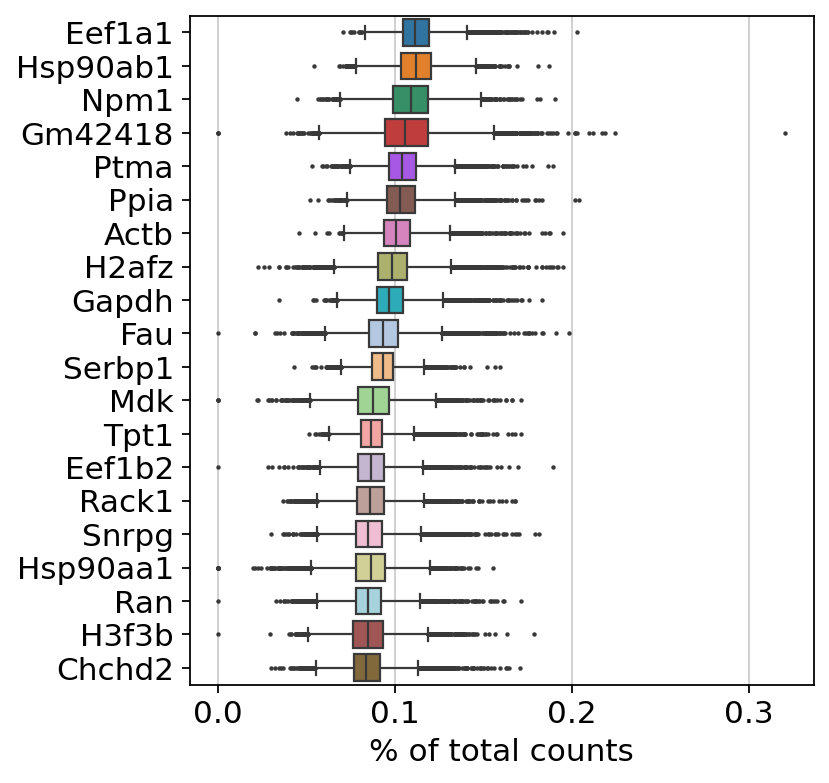

filtered out 241 genes that are detected in less than 5 cells


In [17]:
# basic filtering from scanpy, original code from https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=5)

In [18]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat'
    varm: 'PCs'

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.normalize_per_cell(adata)
#palantir.preprocess.log_transform(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [16]:
#adata=sc.AnnData(norm_df)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='cell_ranger')
sc.pp.pca(adata, n_comps = 50)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


In [17]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat'
    varm: 'PCs'

In [18]:
pca_projections = pd.DataFrame(adata.obsm["X_pca_seurat"],index=adata.obs_names)

In [19]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)


In [20]:
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=None)
ms_data

0         1         2
AAACCCATCGAGGCAA-1_1_1_1_1_1_1_1 -0.428586 -0.245439 -0.040586
AAACGAACATTGCTGA-1_1_1_1_1_1_1_1 -0.417956 -0.237671 -0.040384
AAACGAAGTATCGATC-1_1_1_1_1_1_1_1 -0.393201 -0.206729 -0.028601
AAACGCTCAGAGTAAT-1_1_1_1_1_1_1_1 -0.350922 -0.180479 -0.031349
AAAGAACAGCAACAGC-1_1_1_1_1_1_1_1 -0.350811 -0.178094 -0.032516
...                                    ...       ...       ...
TTTGGTTTCGTTGTAG-1_2              0.233982 -0.001776 -0.308356
TTTGGTTTCTTCGTAT-1_2              0.323887 -0.106799  0.083679
TTTGTTGAGATTGTGA-1_2              0.207731 -0.002846 -0.265866
TTTGTTGAGTCACTGT-1_2              0.491801 -0.330035  0.146928
TTTGTTGCACTAACGT-1_2              0.215109  0.011650 -0.316918

[12000 rows x 3 columns]

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:30)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

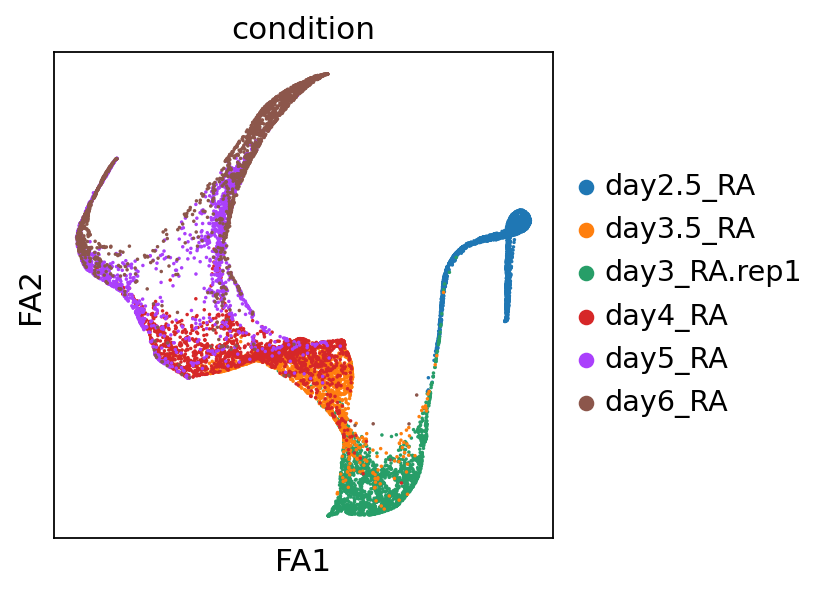

In [21]:
# generate neighbor draph in multiscale diffusion space
adata.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_palantir")
# draw ForceAtlas2 embedding using 2 first PCs as initial positions
adata.obsm["X_pca2d"]=adata.obsm["X_umap_seurat"][:,:2]
sc.tl.draw_graph(adata, init_pos='X_pca2d')
sc.pl.draw_graph(adata, color="condition",color_map="RdBu_r")

In [22]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'draw_graph', 'condition_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat', 'X_palantir', 'X_pca2d', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

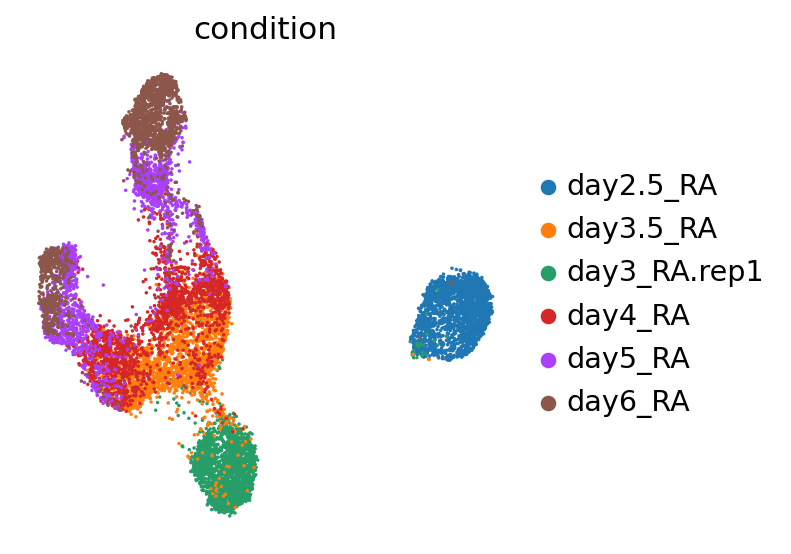

In [24]:
sc.pl.embedding(
    adata,
    basis="umap",
    color = 'condition',
    frameon=False,
)

In [ ]:
#Tree learning with SimplePPT

In [55]:
scf.tl.tree(adata,method="ppt", Nodes=100, use_rep="umap",
            device="cpu",
            seed=1,
            ppt_lambda=2000,
            ppt_sigma=0.2,
            ppt_nsteps=200)

inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.2, lambda = 2000, metric = euclidean
    fitting:  14%|█▍        | 28/200 [00:02<00:13, 12.99it/s]
    converged
    finished (0:00:02) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

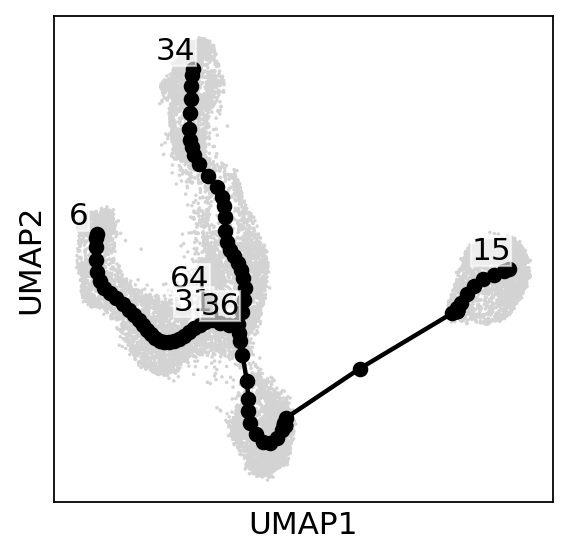

In [56]:
adata
# projecting results onto ForceAtlas2 embedding
scf.pl.graph(adata, basis = 'umap')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

    graph cleaned --> removed 6 principal points


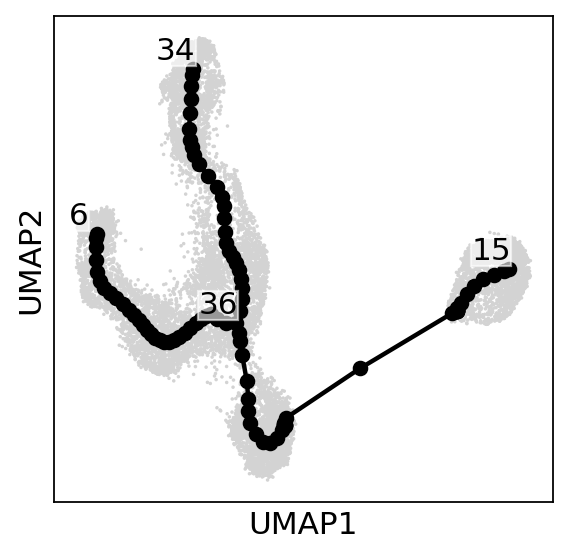

In [57]:
scf.tl.cleanup(adata,minbranchlength=10);
scf.pl.graph(adata, basis = 'umap')

In [58]:
# Selecting a root and computing pseudotime
# Using CD34 marker, we can confidently tell that the tip 163 is the root.
scf.tl.root(adata, 15)

node 15 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [59]:
# Here we are going to generate 100 mappings of pseudotime, to account for cell asssignment uncertainty. 
# to .obs will be saved the mean of all calculated pseudotimes.
# exmaple data takes > 360G memory and 16 nodes
scf.tl.pseudotime(adata, seed=42, n_jobs=20,n_map=100)

projecting cells onto the principal graph
    mappings:   0%|          | 0/100 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    mappings: 100%|██████████| 100/100 [02:17<00:00,  1.38s/it]
    finished (0:02:24) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [60]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'draw_graph', 'condition_colors', 'graph', 'ppt', 'pseudotime_list', 'milestones_colors', 'seg_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat', 'X_palantir', 'X_pca2d', 'X_draw_graph_fa', 'X_R'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [61]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5.h5ad'), compression="gzip")

In [9]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5.h5ad'),chunk_size=6000)

In [62]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'draw_graph', 'condition_colors', 'graph', 'ppt', 'pseudotime_list', 'milestones_colors', 'seg_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat', 'X_palantir', 'X_pca2d', 'X_draw_graph_fa', 'X_R'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


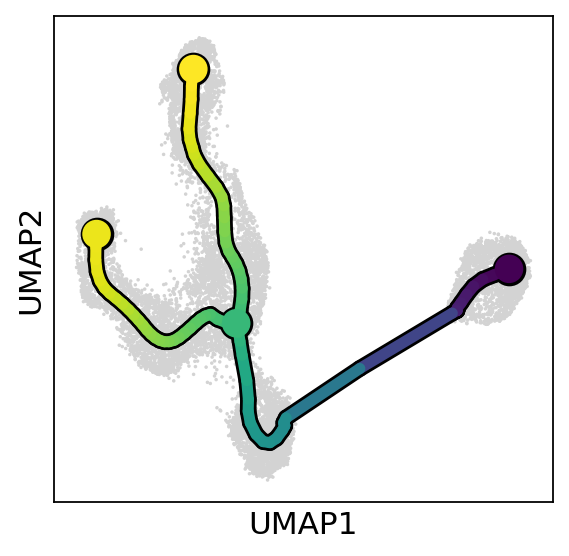

In [64]:
# Representing the trajectory and tree on top of existing embedding
scf.pl.trajectory(adata, basis = 'umap')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

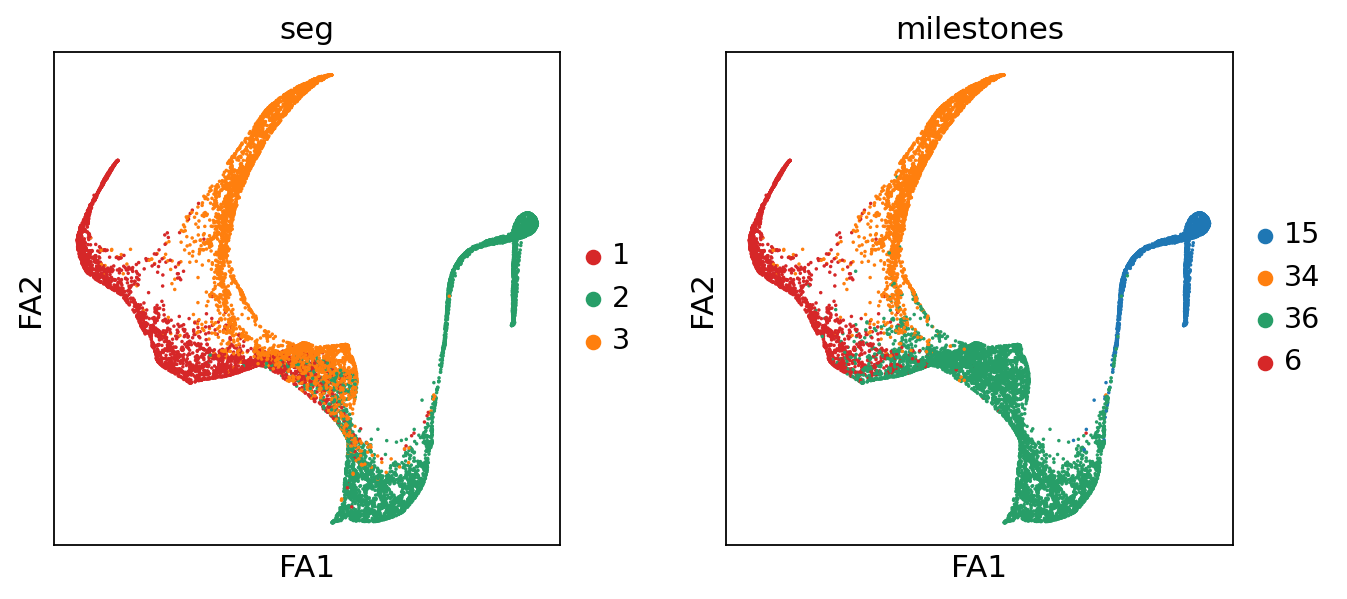

In [67]:
sc.pl.draw_graph(adata,color=["seg","milestones"])

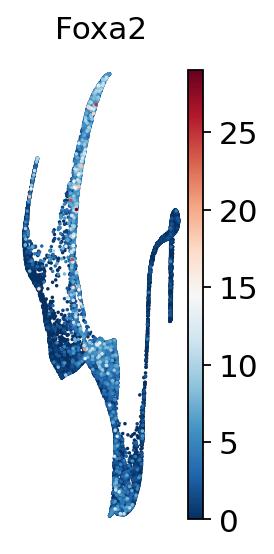

In [82]:
sc.pl.draw_graph(adata,color="Foxa2",color_map="RdBu_r")

In [73]:
scf.tl.rename_milestones(adata,["Root","FP","Bifu","NP"])
# we change the color of the root milestone for better visualisations
adata.uns["milestones_colors"][3]="#17bece"

In [74]:
from pathlib import Path
Path(os.path.join(outDir, "figures/")).mkdir(parents=True, exist_ok=True)

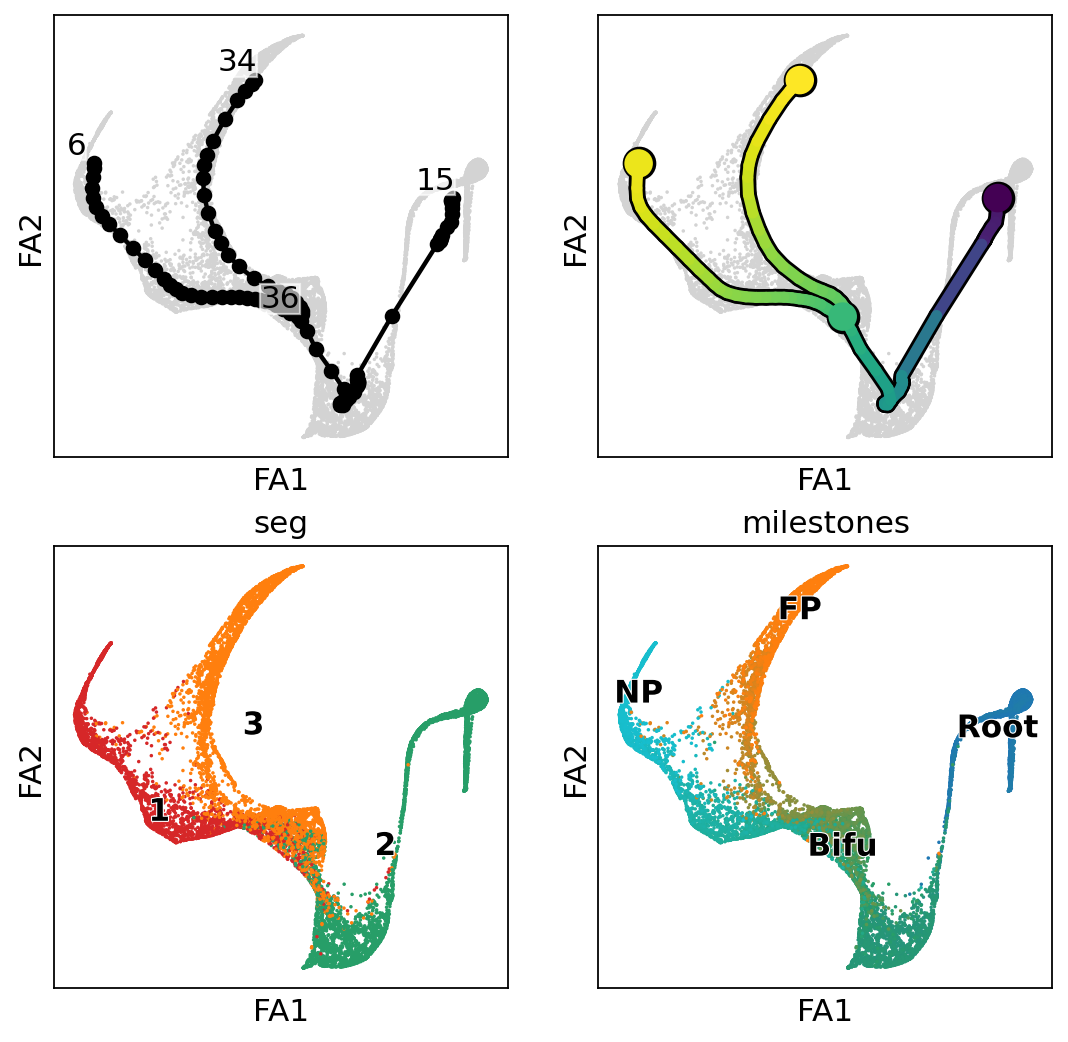

In [75]:
sc.set_figure_params()
fig, axs=plt.subplots(2,2,figsize=(8,8))
axs=axs.ravel()
scf.pl.graph(adata,basis="draw_graph_fa",show=False,ax=axs[0])
scf.pl.trajectory(adata,basis="draw_graph_fa",show=False,ax=axs[1])
sc.pl.draw_graph(adata,color=["seg"],legend_loc="on data",show=False,ax=axs[2],legend_fontoutline=True)
scf.pl.milestones(adata,ax=axs[3],show=False,annotate=True)
plt.savefig(os.path.join(outDir, "figures/A.pdf"),dpi=300)

In [76]:
# as a dendrogram representation (take some 5-10 minutes)
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [04:45<00:00, 95.28s/it] 
    finished (0:04:45) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


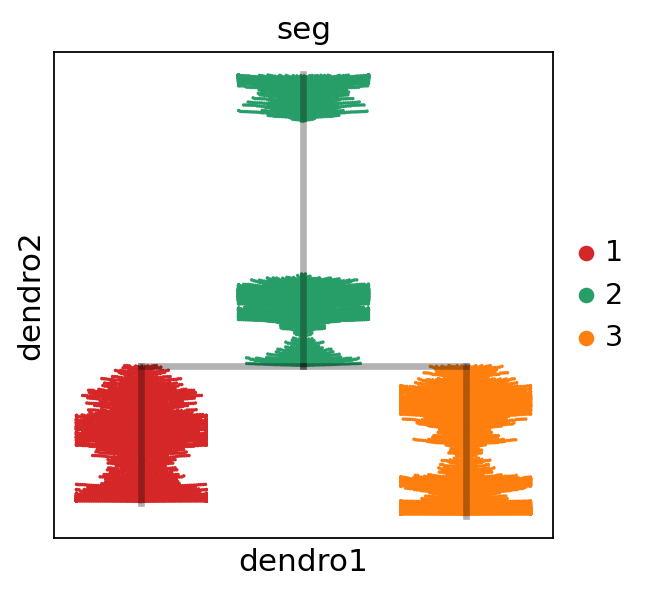

In [77]:
scf.pl.dendrogram(adata,color="seg")

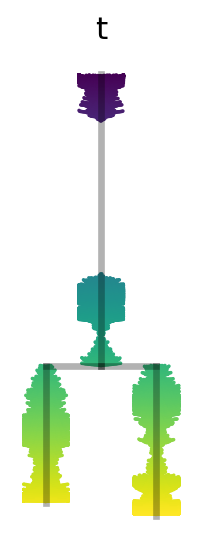

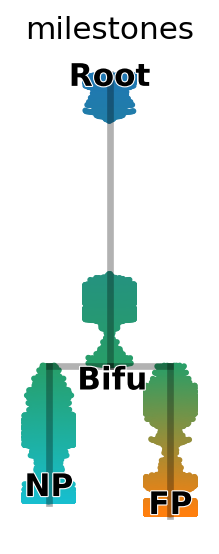

In [78]:
sc.set_figure_params(figsize=(1.5,4),frameon=False,dpi_save=300)
scf.pl.dendrogram(adata,color="t",show_info=False,
                  save="B1.pdf",
                  cmap="viridis")
scf.pl.dendrogram(adata,color="milestones",legend_loc="on data",
                  color_milestones=True,legend_fontoutline=True, 
                  save="B2.pdf")


In [79]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_before.test.asssociation.h5ad'), compression="gzip")

In [18]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_before.test.asssociation.h5ad'),chunk_size=6000)

In [19]:
# Test and fit features associated with the tree
scf.tl.test_association(adata,n_jobs=20, A_cut=0.5)

test features for association with the trajectory
    single mapping :   0%|          | 0/18369 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 10/18369 [01:28<44:57:22,  8.82s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 22/18369 [01:30<20:59:27,  4.12s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 26/18369 [01:31<17:56:32,  3.52s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 30/18369 [01:31<15:36:21,  3.06s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 45/18369 [01:33<10:37:55,  2.09s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 48/18369 [01:34<10:00:58,  1.97s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 155/18369 [02:30<4:55:32,  1.03it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 159/18369 [02:36<4:59:30,  1.01it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 176/18369 [02:49<4:51:21,  1.04it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 183/18369 [03:03<5:03:23,  1.00s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 199/18369 [03:25<5:12:31,  1.03s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 207/18369 [03:43<5:26:35,  1.08s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|▏         | 238/18369 [04:04<5:10:41,  1.03s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 311/18369 [04:22<4:13:36,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 313/18369 [04:29<4:18:38,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 314/18369 [04:36<4:25:17,  1.13it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 321/18369 [04:44<4:26:19,  1.13it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 327/18369 [04:59<4:35:12,  1.09it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 339/18369 [05:21<4:44:57,  1.05it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 343/18369 [05:27<4:46:48,  1.05it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 375/18369 [05:40<4:32:09,  1.10it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 416/18369 [05:49<4:11:22,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 447/18369 [06:23<4:15:57,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 453/18369 [06:31<4:18:03,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 456/18369 [06:39<4:21:20,  1.14it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 461/18369 [06:53<4:27:36,  1.12it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 463/18369 [07:06<4:35:11,  1.08it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 488/18369 [07:12<4:24:19,  1.13it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 503/18369 [07:20<4:20:45,  1.14it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 578/18369 [07:49<4:01:00,  1.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 582/18369 [07:56<4:02:42,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 586/18369 [08:11<4:08:32,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 587/18369 [08:26<4:15:42,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 591/18369 [08:33<4:17:23,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 595/18369 [08:40<4:18:54,  1.14it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 599/18369 [08:46<4:20:30,  1.14it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▎         | 675/18369 [09:10<4:00:23,  1.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▎         | 683/18369 [09:19<4:01:16,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 692/18369 [09:27<4:01:34,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 701/18369 [09:44<4:05:32,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 718/18369 [10:00<4:06:07,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 731/18369 [10:29<4:13:01,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 787/18369 [10:38<3:57:55,  1.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 833/18369 [11:16<3:57:24,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 846/18369 [11:46<4:03:49,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 857/18369 [12:00<4:05:20,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 861/18369 [12:08<4:07:01,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 939/18369 [12:31<3:52:22,  1.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 945/18369 [12:39<3:53:28,  1.24it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 949/18369 [12:47<3:54:42,  1.24it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 960/18369 [13:08<3:58:14,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 974/18369 [13:14<3:56:34,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 980/18369 [13:30<3:59:36,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 981/18369 [13:38<4:01:39,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 985/18369 [13:54<4:05:32,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1074/18369 [14:37<3:55:27,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1092/18369 [14:45<3:53:22,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1100/18369 [15:03<3:56:26,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1103/18369 [15:19<3:59:55,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1120/18369 [15:42<4:01:56,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1224/18369 [16:17<3:48:19,  1.25it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1229/18369 [16:25<3:49:10,  1.25it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1238/18369 [17:00<3:55:17,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1241/18369 [17:29<4:01:22,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1284/18369 [17:40<3:55:12,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1354/18369 [18:23<3:51:09,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1355/18369 [18:32<3:52:44,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1367/18369 [18:48<3:53:57,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1370/18369 [19:03<3:56:27,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1377/18369 [19:10<3:56:38,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1439/18369 [19:36<3:50:37,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1476/18369 [19:53<3:47:38,  1.24it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1489/18369 [20:10<3:48:42,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1492/18369 [20:26<3:51:17,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1494/18369 [20:33<3:52:14,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1500/18369 [20:41<3:52:46,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1502/18369 [20:56<3:55:15,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1513/18369 [21:11<3:56:01,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▊         | 1562/18369 [21:23<3:50:14,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1616/18369 [21:50<3:46:24,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1624/18369 [22:07<3:48:12,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1627/18369 [22:16<3:49:17,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1630/18369 [22:33<3:51:40,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1641/18369 [23:03<3:54:58,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1725/18369 [23:32<3:47:06,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1732/18369 [23:41<3:47:31,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1738/18369 [23:50<3:48:05,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1747/18369 [23:58<3:48:07,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1753/18369 [24:07<3:48:38,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1755/18369 [24:15<3:49:38,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1759/18369 [24:36<3:52:21,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1764/18369 [24:44<3:52:52,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1851/18369 [25:09<3:44:34,  1.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1868/18369 [25:19<3:43:43,  1.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1878/18369 [25:37<3:45:03,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1879/18369 [25:44<3:45:56,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1882/18369 [25:53<3:46:47,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1885/18369 [25:59<3:47:21,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1889/18369 [26:14<3:48:55,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1890/18369 [26:21<3:49:49,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1905/18369 [26:39<3:50:25,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 1990/18369 [26:59<3:42:11,  1.23it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2008/18369 [27:18<3:42:33,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2010/18369 [27:36<3:44:39,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2014/18369 [27:43<3:45:09,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2015/18369 [27:52<3:46:13,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2017/18369 [27:59<3:46:53,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2019/18369 [28:14<3:48:40,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2021/18369 [28:21<3:49:25,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2121/18369 [29:00<3:42:16,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2137/18369 [29:09<3:41:31,  1.22it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2150/18369 [29:34<3:43:09,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2255/18369 [31:05<3:42:07,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2268/18369 [31:14<3:41:45,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2276/18369 [31:39<3:43:52,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2278/18369 [31:46<3:44:28,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2280/18369 [32:01<3:45:58,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2281/18369 [32:08<3:46:40,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2363/18369 [32:25<3:39:39,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2389/18369 [32:53<3:40:00,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2400/18369 [33:15<3:41:18,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2403/18369 [33:33<3:42:59,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2415/18369 [33:58<3:44:24,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2506/18369 [34:21<3:37:30,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2512/18369 [34:30<3:37:52,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2513/18369 [34:40<3:38:49,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2519/18369 [34:50<3:39:13,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2524/18369 [34:57<3:39:29,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2536/18369 [35:18<3:40:28,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2539/18369 [35:35<3:41:51,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2541/18369 [35:42<3:42:23,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2576/18369 [35:59<3:40:38,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2601/18369 [36:08<3:39:03,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2658/18369 [36:47<3:37:26,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2660/18369 [37:12<3:39:42,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2663/18369 [37:19<3:40:08,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2666/18369 [37:28<3:40:42,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2669/18369 [37:36<3:41:11,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2767/18369 [38:13<3:35:31,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2779/18369 [38:21<3:35:10,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2786/18369 [38:28<3:35:14,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2788/18369 [38:36<3:35:48,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2790/18369 [38:44<3:36:22,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2794/18369 [39:00<3:37:25,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2796/18369 [39:08<3:38:01,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2799/18369 [39:17<3:38:35,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2801/18369 [39:23<3:38:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2835/18369 [39:50<3:38:15,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2913/18369 [40:30<3:34:57,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2921/18369 [40:39<3:35:00,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2924/18369 [40:56<3:36:14,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2932/18369 [41:03<3:36:10,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2934/18369 [41:11<3:36:41,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▋        | 3016/18369 [41:47<3:32:44,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▋        | 3027/18369 [41:56<3:32:32,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3048/18369 [42:26<3:33:20,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3051/18369 [42:40<3:34:15,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3062/18369 [42:55<3:34:33,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3063/18369 [43:03<3:35:09,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3096/18369 [43:28<3:34:26,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3129/18369 [43:38<3:32:34,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3181/18369 [44:02<3:30:17,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3183/18369 [44:10<3:30:45,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3188/18369 [44:25<3:31:33,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3190/18369 [44:33<3:32:01,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3191/18369 [44:43<3:32:43,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3193/18369 [44:57<3:33:41,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3195/18369 [45:05<3:34:07,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3301/18369 [45:50<3:29:14,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3305/18369 [45:59<3:29:36,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3315/18369 [46:17<3:30:13,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3316/18369 [46:33<3:31:22,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3318/18369 [46:42<3:31:52,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3321/18369 [46:57<3:32:47,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▊        | 3433/18369 [47:33<3:26:56,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▊        | 3442/18369 [47:45<3:27:07,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3448/18369 [48:12<3:28:38,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3449/18369 [48:20<3:29:09,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3456/18369 [48:28<3:29:09,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3458/18369 [48:36<3:29:37,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3460/18369 [48:45<3:30:05,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3482/18369 [49:08<3:30:05,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3554/18369 [49:22<3:25:51,  1.20it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3575/18369 [49:55<3:26:34,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3579/18369 [50:19<3:27:56,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3580/18369 [50:35<3:29:01,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3582/18369 [50:43<3:29:23,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3710/18369 [51:33<3:23:44,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3716/18369 [51:42<3:23:52,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3718/18369 [52:14<3:25:51,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3719/18369 [52:28<3:26:41,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3834/18369 [53:38<3:23:19,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3838/18369 [53:54<3:24:06,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3840/18369 [54:10<3:24:57,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3841/18369 [54:18<3:25:25,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3878/18369 [54:34<3:23:54,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 3959/18369 [55:19<3:21:24,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 3967/18369 [55:36<3:21:51,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 3970/18369 [55:43<3:22:08,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 3973/18369 [55:51<3:22:24,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 3975/18369 [56:07<3:23:12,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 3982/18369 [56:22<3:23:41,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4076/18369 [57:05<3:20:13,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4077/18369 [57:13<3:20:37,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4102/18369 [57:46<3:20:56,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4106/18369 [57:54<3:21:08,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4143/18369 [58:09<3:19:41,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4219/18369 [58:53<3:17:29,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4222/18369 [59:18<3:18:42,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4227/18369 [59:25<3:18:48,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4231/18369 [59:33<3:19:00,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4240/18369 [59:42<3:18:57,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4296/18369 [1:00:11<3:17:10,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4306/18369 [1:00:12<3:16:38,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▎       | 4320/18369 [1:00:22<3:16:20,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▎       | 4347/18369 [1:00:39<3:15:40,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▎       | 4361/18369 [1:00:47<3:15:16,  1.20it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4363/18369 [1:01:12<3:16:28,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4368/18369 [1:01:25<3:16:54,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4393/18369 [1:02:01<3:17:20,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4470/18369 [1:02:36<3:14:38,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4486/18369 [1:03:01<3:15:02,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4493/18369 [1:03:25<3:15:51,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4502/18369 [1:03:48<3:16:33,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4591/18369 [1:04:08<3:12:28,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4605/18369 [1:04:26<3:12:35,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4606/18369 [1:04:42<3:13:22,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4614/18369 [1:04:50<3:13:17,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4617/18369 [1:04:57<3:13:30,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4619/18369 [1:05:12<3:14:07,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4620/18369 [1:05:21<3:14:31,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4622/18369 [1:05:30<3:14:50,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4743/18369 [1:06:16<3:10:25,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4747/18369 [1:06:26<3:10:38,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4755/18369 [1:06:42<3:10:58,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4759/18369 [1:06:59<3:11:36,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4760/18369 [1:07:17<3:12:22,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▋       | 4822/18369 [1:07:42<3:10:12,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▋       | 4864/18369 [1:08:09<3:09:14,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4875/18369 [1:08:26<3:09:27,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4880/18369 [1:08:42<3:09:55,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4886/18369 [1:08:58<3:10:19,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4888/18369 [1:09:05<3:10:33,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4889/18369 [1:09:13<3:10:50,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4894/18369 [1:09:21<3:10:57,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4998/18369 [1:09:50<3:06:50,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5005/18369 [1:09:58<3:06:51,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5013/18369 [1:10:16<3:07:14,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5017/18369 [1:10:32<3:07:44,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5018/18369 [1:10:39<3:07:59,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5020/18369 [1:10:53<3:08:31,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5022/18369 [1:11:02<3:08:48,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5038/18369 [1:11:17<3:08:39,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5133/18369 [1:11:57<3:05:33,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5136/18369 [1:12:05<3:05:44,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5142/18369 [1:12:15<3:05:52,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5147/18369 [1:12:33<3:06:23,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5149/18369 [1:12:40<3:06:35,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5151/18369 [1:12:57<3:07:12,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▊       | 5259/18369 [1:13:43<3:03:47,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▊       | 5266/18369 [1:13:51<3:03:46,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▊       | 5274/18369 [1:14:07<3:04:02,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▊       | 5280/18369 [1:14:15<3:04:04,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5284/18369 [1:14:30<3:04:30,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5341/18369 [1:15:14<3:03:31,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5403/18369 [1:15:43<3:01:43,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5406/18369 [1:16:00<3:02:16,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5412/18369 [1:16:17<3:02:38,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5415/18369 [1:16:31<3:03:04,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5499/18369 [1:17:13<3:00:44,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5530/18369 [1:17:37<3:00:13,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5533/18369 [1:17:45<3:00:23,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5538/18369 [1:18:11<3:01:10,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5545/18369 [1:18:18<3:01:07,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5546/18369 [1:18:33<3:01:37,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5577/18369 [1:18:50<3:00:50,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5634/18369 [1:19:01<2:58:37,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5666/18369 [1:19:26<2:58:06,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5669/18369 [1:19:33<2:58:14,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5674/18369 [1:19:47<2:58:31,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5677/18369 [1:19:56<2:58:43,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5679/18369 [1:20:03<2:58:52,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5681/18369 [1:20:11<2:59:06,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5690/18369 [1:20:27<2:59:16,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5755/18369 [1:20:46<2:57:03,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5794/18369 [1:21:13<2:56:17,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5796/18369 [1:21:21<2:56:28,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5806/18369 [1:21:29<2:56:19,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5813/18369 [1:21:50<2:56:45,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5816/18369 [1:22:05<2:57:11,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5866/18369 [1:22:33<2:55:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5912/18369 [1:22:55<2:54:43,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5923/18369 [1:23:03<2:54:32,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5929/18369 [1:23:11<2:54:32,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5936/18369 [1:23:18<2:54:30,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5938/18369 [1:23:34<2:54:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5942/18369 [1:23:42<2:55:04,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5946/18369 [1:23:51<2:55:12,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5948/18369 [1:23:58<2:55:22,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6017/18369 [1:24:34<2:53:37,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6049/18369 [1:24:43<2:52:32,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6066/18369 [1:24:52<2:52:09,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6068/18369 [1:25:01<2:52:21,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6075/18369 [1:25:26<2:52:54,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6078/18369 [1:25:48<2:53:30,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6088/18369 [1:26:04<2:53:38,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6169/18369 [1:26:28<2:51:00,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6184/18369 [1:26:46<2:50:58,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6190/18369 [1:26:54<2:51:00,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6195/18369 [1:27:02<2:51:02,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6198/18369 [1:27:09<2:51:08,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6199/18369 [1:27:18<2:51:25,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6200/18369 [1:27:33<2:51:50,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6207/18369 [1:27:41<2:51:49,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6312/18369 [1:28:24<2:48:52,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6318/18369 [1:28:32<2:48:53,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6326/18369 [1:28:48<2:49:04,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6331/18369 [1:29:04<2:49:22,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6334/18369 [1:29:29<2:50:02,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6344/18369 [1:29:47<2:50:12,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6448/18369 [1:30:28<2:47:15,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6450/18369 [1:30:36<2:47:26,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6460/18369 [1:30:53<2:47:32,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6470/18369 [1:31:15<2:47:49,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6537/18369 [1:31:51<2:46:16,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6579/18369 [1:32:24<2:45:35,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6585/18369 [1:32:31<2:45:35,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6590/18369 [1:32:48<2:45:52,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6593/18369 [1:32:57<2:46:01,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6595/18369 [1:33:04<2:46:10,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6598/18369 [1:33:18<2:46:28,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6604/18369 [1:33:26<2:46:27,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6714/18369 [1:33:55<2:43:02,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6715/18369 [1:34:10<2:43:27,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6720/18369 [1:34:20<2:43:32,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6725/18369 [1:34:28<2:43:34,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6726/18369 [1:34:37<2:43:47,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6731/18369 [1:34:44<2:43:49,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6733/18369 [1:34:54<2:44:00,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6747/18369 [1:35:26<2:44:23,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6843/18369 [1:35:55<2:41:33,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6848/18369 [1:36:02<2:41:35,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6852/18369 [1:36:13<2:41:43,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6856/18369 [1:36:36<2:42:14,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6863/18369 [1:36:50<2:42:21,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6973/18369 [1:37:40<2:39:37,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6978/18369 [1:37:48<2:39:39,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6988/18369 [1:37:57<2:39:31,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6990/18369 [1:38:15<2:39:57,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6992/18369 [1:38:31<2:40:18,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6995/18369 [1:38:46<2:40:36,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7077/18369 [1:39:30<2:38:46,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7104/18369 [1:39:52<2:38:23,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7111/18369 [1:40:02<2:38:23,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7112/18369 [1:40:17<2:38:43,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7115/18369 [1:40:33<2:39:03,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▊      | 7116/18369 [1:40:42<2:39:16,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7226/18369 [1:41:35<2:36:40,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7233/18369 [1:41:44<2:36:39,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7238/18369 [1:41:53<2:36:41,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7242/18369 [1:42:09<2:36:57,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7246/18369 [1:42:23<2:37:11,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7247/18369 [1:42:37<2:37:29,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 7301/18369 [1:42:52<2:35:57,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7362/18369 [1:43:12<2:34:17,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7363/18369 [1:43:30<2:34:43,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7372/18369 [1:43:38<2:34:36,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7376/18369 [1:44:11<2:35:17,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7382/18369 [1:44:19<2:35:16,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7477/18369 [1:44:59<2:32:56,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7479/18369 [1:45:06<2:33:02,  1.19it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7482/18369 [1:45:14<2:33:07,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7500/18369 [1:45:29<2:32:52,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7502/18369 [1:45:45<2:33:12,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7506/18369 [1:45:53<2:33:14,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7531/18369 [1:46:32<2:33:20,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7630/18369 [1:47:06<2:30:45,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7631/18369 [1:47:15<2:30:56,  1.19it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7634/18369 [1:47:25<2:31:04,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7639/18369 [1:47:42<2:31:16,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7640/18369 [1:47:56<2:31:35,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7643/18369 [1:48:05<2:31:42,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7726/18369 [1:48:43<2:29:46,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7750/18369 [1:49:12<2:29:38,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7757/18369 [1:49:37<2:29:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7762/18369 [1:49:45<2:29:59,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7765/18369 [1:49:54<2:30:06,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7769/18369 [1:50:03<2:30:09,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7857/18369 [1:50:37<2:28:00,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7863/18369 [1:50:47<2:28:01,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7872/18369 [1:51:01<2:28:03,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7884/18369 [1:51:16<2:27:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7895/18369 [1:51:50<2:28:22,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7898/18369 [1:51:58<2:28:26,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7956/18369 [1:52:15<2:26:55,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8013/18369 [1:52:55<2:25:57,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8022/18369 [1:53:04<2:25:50,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8023/18369 [1:53:39<2:26:33,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▎     | 8028/18369 [1:53:46<2:26:32,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8130/18369 [1:54:40<2:24:24,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8135/18369 [1:54:47<2:24:25,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8139/18369 [1:54:56<2:24:28,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8141/18369 [1:55:06<2:24:36,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8145/18369 [1:55:28<2:24:56,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8146/18369 [1:55:37<2:25:06,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8217/18369 [1:56:05<2:23:26,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8242/18369 [1:56:24<2:23:02,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8262/18369 [1:56:33<2:22:35,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8269/18369 [1:56:51<2:22:44,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8277/18369 [1:57:06<2:22:47,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8279/18369 [1:57:22<2:23:03,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8282/18369 [1:57:41<2:23:20,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8340/18369 [1:58:03<2:21:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8383/18369 [1:58:25<2:21:03,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8388/18369 [1:58:35<2:21:07,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8392/18369 [1:58:44<2:21:09,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8401/18369 [1:59:01<2:21:14,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8405/18369 [1:59:19<2:21:26,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8408/18369 [1:59:26<2:21:30,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8412/18369 [1:59:33<2:21:31,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8453/18369 [1:59:48<2:20:32,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8508/18369 [2:00:08<2:19:15,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8514/18369 [2:00:16<2:19:13,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8520/18369 [2:00:24<2:19:11,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8528/18369 [2:00:34<2:19:08,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8539/18369 [2:00:57<2:19:14,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8542/18369 [2:01:14<2:19:29,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8550/18369 [2:01:30<2:19:32,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8649/18369 [2:01:57<2:17:03,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8661/18369 [2:02:15<2:17:01,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8665/18369 [2:02:39<2:17:21,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8672/18369 [2:02:47<2:17:17,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8677/18369 [2:03:22<2:17:48,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8688/18369 [2:03:31<2:17:38,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8797/18369 [2:04:12<2:15:08,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8799/18369 [2:04:21<2:15:14,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8805/18369 [2:04:37<2:15:22,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8811/18369 [2:04:46<2:15:21,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8816/18369 [2:05:04<2:15:31,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8818/18369 [2:05:11<2:15:36,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8858/18369 [2:05:34<2:14:49,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▊     | 8925/18369 [2:06:02<2:13:22,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▊     | 8930/18369 [2:06:14<2:13:26,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▊     | 8935/18369 [2:06:22<2:13:25,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▊     | 8942/18369 [2:06:31<2:13:23,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▊     | 8944/18369 [2:06:40<2:13:29,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▊     | 8947/18369 [2:07:02<2:13:46,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9053/18369 [2:07:59<2:11:42,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9067/18369 [2:08:07<2:11:27,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9069/18369 [2:08:15<2:11:32,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9077/18369 [2:08:42<2:11:45,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9079/18369 [2:08:50<2:11:50,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9121/18369 [2:09:23<2:11:11,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9191/18369 [2:09:58<2:09:47,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9203/18369 [2:10:33<2:10:02,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9204/18369 [2:10:40<2:10:07,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9205/18369 [2:10:48<2:10:13,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9211/18369 [2:11:04<2:10:19,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9277/18369 [2:11:15<2:08:38,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9315/18369 [2:11:39<2:07:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9317/18369 [2:11:48<2:08:04,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9322/18369 [2:11:58<2:08:04,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9336/18369 [2:12:15<2:07:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9339/18369 [2:12:24<2:08:02,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9340/18369 [2:12:40<2:08:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9358/18369 [2:12:56<2:08:00,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████▏    | 9451/18369 [2:13:27<2:05:55,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████▏    | 9454/18369 [2:13:35<2:05:58,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████▏    | 9456/18369 [2:13:51<2:06:10,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████▏    | 9459/18369 [2:13:59<2:06:13,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9463/18369 [2:14:08<2:06:15,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9467/18369 [2:14:24<2:06:23,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9470/18369 [2:14:33<2:06:26,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9518/18369 [2:15:08<2:05:40,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9556/18369 [2:15:14<2:04:43,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9573/18369 [2:15:33<2:04:33,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9578/18369 [2:15:42<2:04:33,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9586/18369 [2:15:50<2:04:27,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9592/18369 [2:16:08<2:04:34,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9594/18369 [2:16:34<2:04:55,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9614/18369 [2:16:50<2:04:37,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9716/18369 [2:17:30<2:02:27,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9717/18369 [2:17:37<2:02:32,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9725/18369 [2:17:45<2:02:26,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9726/18369 [2:18:01<2:02:39,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9729/18369 [2:18:17<2:02:48,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9732/18369 [2:18:24<2:02:50,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9821/18369 [2:19:06<2:01:04,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9827/18369 [2:19:28<2:01:14,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▎    | 9845/18369 [2:19:39<2:00:54,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▎    | 9847/18369 [2:19:47<2:00:59,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▎    | 9851/18369 [2:20:13<2:01:14,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▎    | 9855/18369 [2:20:22<2:01:16,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9966/18369 [2:21:08<1:59:00,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9969/18369 [2:21:24<1:59:09,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9974/18369 [2:21:32<1:59:07,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9987/18369 [2:21:49<1:59:02,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9989/18369 [2:21:57<1:59:05,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9991/18369 [2:22:12<1:59:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9992/18369 [2:22:23<1:59:22,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10091/18369 [2:23:04<1:57:21,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10094/18369 [2:23:12<1:57:23,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10109/18369 [2:23:37<1:57:21,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10113/18369 [2:23:44<1:57:20,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10122/18369 [2:24:11<1:57:28,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10204/18369 [2:24:46<1:55:50,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10241/18369 [2:25:14<1:55:16,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10247/18369 [2:25:30<1:55:20,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10248/18369 [2:25:37<1:55:24,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10252/18369 [2:26:02<1:55:37,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10256/18369 [2:26:09<1:55:36,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10258/18369 [2:26:16<1:55:39,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▋    | 10367/18369 [2:26:57<1:53:25,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▋    | 10368/18369 [2:27:13<1:53:36,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▋    | 10373/18369 [2:27:22<1:53:36,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10380/18369 [2:27:44<1:53:42,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10382/18369 [2:28:01<1:53:52,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10435/18369 [2:28:21<1:52:47,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10501/18369 [2:29:00<1:51:38,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10509/18369 [2:29:27<1:51:47,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10510/18369 [2:29:36<1:51:52,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10513/18369 [2:29:45<1:51:54,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10514/18369 [2:29:53<1:51:59,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10517/18369 [2:30:00<1:51:59,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10601/18369 [2:30:38<1:50:23,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10615/18369 [2:30:49<1:50:10,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10628/18369 [2:31:07<1:50:04,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10638/18369 [2:31:29<1:50:05,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10640/18369 [2:31:39<1:50:09,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10642/18369 [2:31:47<1:50:12,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10643/18369 [2:32:05<1:50:24,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10712/18369 [2:32:24<1:48:56,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▊    | 10756/18369 [2:32:56<1:48:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▊    | 10768/18369 [2:33:21<1:48:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▊    | 10770/18369 [2:33:46<1:48:29,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10853/18369 [2:34:28<1:46:59,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10866/18369 [2:34:37<1:46:46,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10867/18369 [2:34:46<1:46:50,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10877/18369 [2:34:55<1:46:42,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10890/18369 [2:35:10<1:46:34,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10892/18369 [2:35:34<1:46:47,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10917/18369 [2:35:56<1:46:26,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 11015/18369 [2:36:43<1:44:37,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 11021/18369 [2:36:51<1:44:35,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11024/18369 [2:37:09<1:44:42,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11027/18369 [2:37:26<1:44:49,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11030/18369 [2:37:34<1:44:50,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11117/18369 [2:38:17<1:43:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11125/18369 [2:38:35<1:43:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11133/18369 [2:38:43<1:43:09,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11148/18369 [2:39:06<1:43:03,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11153/18369 [2:39:15<1:43:02,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████▏   | 11276/18369 [2:40:34<1:41:00,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████▏   | 11281/18369 [2:41:00<1:41:09,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████▏   | 11283/18369 [2:41:25<1:41:22,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11393/18369 [2:42:31<1:39:30,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11405/18369 [2:42:48<1:39:24,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11409/18369 [2:42:56<1:39:23,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11412/18369 [2:43:10<1:39:28,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11512/18369 [2:43:50<1:37:35,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11522/18369 [2:44:17<1:37:37,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11529/18369 [2:44:33<1:37:37,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11538/18369 [2:44:43<1:37:31,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11539/18369 [2:44:52<1:37:35,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11542/18369 [2:45:00<1:37:35,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11543/18369 [2:45:26<1:37:50,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11659/18369 [2:46:10<1:35:38,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11663/18369 [2:46:19<1:35:37,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▎   | 11666/18369 [2:46:35<1:35:43,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▎   | 11671/18369 [2:46:50<1:35:45,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▎   | 11673/18369 [2:46:59<1:35:47,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▎   | 11674/18369 [2:47:08<1:35:51,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11770/18369 [2:47:46<1:34:03,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11789/18369 [2:48:02<1:33:47,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11802/18369 [2:48:29<1:33:45,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11803/18369 [2:49:03<1:34:02,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11896/18369 [2:49:46<1:32:22,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11917/18369 [2:50:02<1:32:03,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11925/18369 [2:50:19<1:32:02,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11928/18369 [2:50:35<1:32:06,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11932/18369 [2:50:42<1:32:05,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11934/18369 [2:50:57<1:32:11,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11989/18369 [2:51:21<1:31:11,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12053/18369 [2:51:59<1:30:07,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12057/18369 [2:52:09<1:30:07,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12058/18369 [2:52:18<1:30:10,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12060/18369 [2:52:26<1:30:12,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12064/18369 [2:52:42<1:30:15,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12133/18369 [2:53:22<1:29:06,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 12176/18369 [2:53:49<1:28:24,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 12187/18369 [2:53:58<1:28:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 12192/18369 [2:54:30<1:28:24,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 12195/18369 [2:54:39<1:28:25,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 12198/18369 [2:54:47<1:28:25,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12260/18369 [2:55:19<1:27:21,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12309/18369 [2:55:47<1:26:32,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12312/18369 [2:55:56<1:26:33,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12316/18369 [2:56:13<1:26:36,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12325/18369 [2:56:30<1:26:33,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12334/18369 [2:56:53<1:26:33,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12397/18369 [2:57:07<1:25:19,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12449/18369 [2:57:35<1:24:27,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12451/18369 [2:57:43<1:24:28,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12452/18369 [2:58:00<1:24:35,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12453/18369 [2:58:15<1:24:41,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12462/18369 [2:58:23<1:24:33,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12464/18369 [2:58:38<1:24:37,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12520/18369 [2:59:05<1:23:40,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12566/18369 [2:59:18<1:22:48,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12575/18369 [2:59:36<1:22:45,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12581/18369 [2:59:45<1:22:42,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▊   | 12583/18369 [3:00:02<1:22:47,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▊   | 12586/18369 [3:00:20<1:22:51,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▊   | 12590/18369 [3:00:35<1:22:53,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12679/18369 [3:01:15<1:21:20,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12704/18369 [3:01:26<1:20:54,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12706/18369 [3:01:46<1:21:01,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12709/18369 [3:02:03<1:21:04,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12711/18369 [3:02:26<1:21:12,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12791/18369 [3:03:01<1:19:49,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12821/18369 [3:03:19<1:19:19,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12827/18369 [3:03:28<1:19:16,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12831/18369 [3:03:51<1:19:21,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12833/18369 [3:04:00<1:19:22,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12836/18369 [3:04:16<1:19:26,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 12951/18369 [3:04:54<1:17:21,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 12962/18369 [3:05:12<1:17:15,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 12963/18369 [3:05:21<1:17:17,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 12969/18369 [3:05:39<1:17:18,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 12970/18369 [3:05:48<1:17:20,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 12973/18369 [3:06:03<1:17:23,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13060/18369 [3:06:47<1:15:56,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13082/18369 [3:07:06<1:15:36,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13085/18369 [3:07:25<1:15:41,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████▏  | 13088/18369 [3:07:43<1:15:44,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████▏  | 13092/18369 [3:07:50<1:15:42,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████▏  | 13095/18369 [3:07:58<1:15:42,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████▏  | 13097/18369 [3:08:06<1:15:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13198/18369 [3:08:32<1:13:52,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13220/18369 [3:08:48<1:13:32,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13227/18369 [3:09:16<1:13:34,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13230/18369 [3:09:32<1:13:37,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13232/18369 [3:09:57<1:13:44,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13340/18369 [3:10:46<1:11:54,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13342/18369 [3:10:54<1:11:55,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13353/18369 [3:11:02<1:11:46,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13359/18369 [3:11:20<1:11:45,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13361/18369 [3:11:38<1:11:49,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13364/18369 [3:11:45<1:11:48,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13463/18369 [3:12:27<1:10:07,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13473/18369 [3:12:46<1:10:03,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13475/18369 [3:12:56<1:10:04,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13482/18369 [3:13:04<1:09:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13487/18369 [3:13:20<1:09:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13490/18369 [3:13:27<1:09:58,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13492/18369 [3:13:36<1:09:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13494/18369 [3:13:52<1:10:02,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13590/18369 [3:14:16<1:08:18,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13609/18369 [3:14:42<1:08:06,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13612/18369 [3:14:50<1:08:05,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13615/18369 [3:15:13<1:08:10,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13617/18369 [3:15:22<1:08:10,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13622/18369 [3:15:30<1:08:07,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13623/18369 [3:15:38<1:08:09,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13670/18369 [3:16:04<1:07:24,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13743/18369 [3:16:27<1:06:07,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13744/18369 [3:16:36<1:06:09,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13749/18369 [3:16:54<1:06:09,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13754/18369 [3:17:11<1:06:09,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13756/18369 [3:17:19<1:06:10,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13869/18369 [3:18:28<1:04:23,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13871/18369 [3:18:37<1:04:24,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13874/18369 [3:18:45<1:04:23,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13879/18369 [3:18:53<1:04:20,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13880/18369 [3:19:02<1:04:22,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13881/18369 [3:19:10<1:04:23,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13884/18369 [3:19:19<1:04:23,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▋  | 14008/18369 [3:20:25<1:02:23,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▋  | 14016/18369 [3:20:41<1:02:19,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▋  | 14017/18369 [3:21:09<1:02:27,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▋  | 14020/18369 [3:21:17<1:02:26,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14105/18369 [3:22:07<1:01:06,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14136/18369 [3:22:33<1:00:39,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14141/18369 [3:22:42<1:00:36,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14142/18369 [3:23:15<1:00:45,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14145/18369 [3:23:25<1:00:44,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14258/18369 [3:24:12<58:52,  1.16it/s]  

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14267/18369 [3:24:20<58:44,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14272/18369 [3:24:28<58:41,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14273/18369 [3:24:36<58:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14274/18369 [3:24:44<58:44,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14277/18369 [3:24:54<58:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14279/18369 [3:25:01<58:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14281/18369 [3:25:09<58:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14357/18369 [3:25:46<57:30,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14366/18369 [3:26:03<57:24,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14398/18369 [3:26:13<56:52,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14403/18369 [3:26:38<56:54,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14404/18369 [3:26:54<56:57,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14405/18369 [3:27:04<56:58,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14406/18369 [3:27:11<56:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14528/18369 [3:27:58<54:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14535/18369 [3:28:18<54:56,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14537/18369 [3:28:27<54:57,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14542/18369 [3:28:34<54:53,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14543/18369 [3:29:06<55:00,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14630/18369 [3:29:45<53:36,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14637/18369 [3:30:05<53:34,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14660/18369 [3:30:15<53:11,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14664/18369 [3:30:51<53:16,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14688/18369 [3:31:12<52:56,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|████████  | 14787/18369 [3:31:59<51:21,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14790/18369 [3:32:17<51:22,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14795/18369 [3:32:25<51:19,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14796/18369 [3:32:34<51:20,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14800/18369 [3:32:49<51:19,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14885/18369 [3:33:35<49:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14904/18369 [3:33:53<49:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14914/18369 [3:34:01<49:34,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14921/18369 [3:34:10<49:29,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14923/18369 [3:34:35<49:33,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14924/18369 [3:34:50<49:35,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15041/18369 [3:35:38<47:42,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15056/18369 [3:35:47<47:29,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15064/18369 [3:36:19<47:27,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15109/18369 [3:37:00<46:49,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15181/18369 [3:37:36<45:41,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15183/18369 [3:38:04<45:45,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15185/18369 [3:38:13<45:45,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15187/18369 [3:38:30<45:47,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15190/18369 [3:38:39<45:45,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15303/18369 [3:39:32<43:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15313/18369 [3:39:41<43:50,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15318/18369 [3:39:59<43:49,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15320/18369 [3:40:08<43:48,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15323/18369 [3:40:15<43:46,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15436/18369 [3:41:27<42:04,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15447/18369 [3:41:54<41:58,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15450/18369 [3:42:19<42:00,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15452/18369 [3:42:28<41:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▍ | 15569/18369 [3:43:32<40:12,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▍ | 15582/18369 [3:43:41<40:00,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▍ | 15583/18369 [3:44:21<40:06,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▌ | 15691/18369 [3:45:23<38:28,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▌ | 15704/18369 [3:45:48<38:19,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15706/18369 [3:45:56<38:18,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15707/18369 [3:46:03<38:18,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15713/18369 [3:46:11<38:14,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15814/18369 [3:46:54<36:39,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15820/18369 [3:47:12<36:36,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15833/18369 [3:47:37<36:27,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15835/18369 [3:47:45<36:26,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15843/18369 [3:48:01<36:21,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15939/18369 [3:48:45<34:52,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15944/18369 [3:48:46<34:47,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15958/18369 [3:49:13<34:37,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15961/18369 [3:49:33<34:37,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15962/18369 [3:49:40<34:38,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15963/18369 [3:49:49<34:38,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15964/18369 [3:50:05<34:39,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16080/18369 [3:50:56<32:52,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16089/18369 [3:51:14<32:46,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16093/18369 [3:51:22<32:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16096/18369 [3:51:29<32:41,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16098/18369 [3:51:38<32:40,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16099/18369 [3:51:47<32:40,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16102/18369 [3:51:54<32:39,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16151/18369 [3:52:21<31:54,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16212/18369 [3:53:08<31:01,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16219/18369 [3:53:16<30:55,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16223/18369 [3:53:32<30:53,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16228/18369 [3:53:48<30:50,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16229/18369 [3:53:57<30:51,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16328/18369 [3:54:20<29:17,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16341/18369 [3:54:47<29:08,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16349/18369 [3:54:56<29:01,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16357/18369 [3:55:22<28:57,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16361/18369 [3:55:36<28:55,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16364/18369 [3:55:44<28:52,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16421/18369 [3:56:18<28:02,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 16469/18369 [3:56:45<27:18,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 16471/18369 [3:56:54<27:17,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 16482/18369 [3:57:01<27:08,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 16487/18369 [3:57:10<27:04,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 16489/18369 [3:57:47<27:06,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16605/18369 [3:58:33<25:20,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16616/18369 [3:58:52<25:12,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16621/18369 [3:59:00<25:08,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16622/18369 [3:59:17<25:08,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16623/18369 [3:59:33<25:09,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16625/18369 [3:59:40<25:08,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16732/18369 [4:00:37<23:32,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16741/18369 [4:00:46<23:24,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16755/18369 [4:01:10<23:13,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16811/18369 [4:01:52<22:24,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16874/18369 [4:02:34<21:29,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16883/18369 [4:02:50<21:22,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16885/18369 [4:02:59<21:21,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16986/18369 [4:04:03<19:52,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16991/18369 [4:04:31<19:49,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17006/18369 [4:04:49<19:37,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17014/18369 [4:04:57<19:30,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17015/18369 [4:05:30<19:32,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17085/18369 [4:05:42<18:27,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17122/18369 [4:06:15<17:56,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17125/18369 [4:06:27<17:54,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17126/18369 [4:06:35<17:53,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17129/18369 [4:06:43<17:51,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17139/18369 [4:07:00<17:43,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17144/18369 [4:07:15<17:40,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17153/18369 [4:07:22<17:32,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▎| 17210/18369 [4:07:46<16:41,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17251/18369 [4:08:02<16:04,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17256/18369 [4:08:10<16:00,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17259/18369 [4:08:18<15:58,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17268/18369 [4:08:53<15:52,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17273/18369 [4:09:18<15:49,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17275/18369 [4:09:25<15:47,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17285/18369 [4:09:34<15:39,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17361/18369 [4:09:59<14:30,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17386/18369 [4:10:17<14:09,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17390/18369 [4:10:26<14:05,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17391/18369 [4:10:36<14:05,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17396/18369 [4:10:51<14:01,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17400/18369 [4:11:07<13:59,  1.15it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17415/18369 [4:11:31<13:46,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17450/18369 [4:11:39<13:15,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17526/18369 [4:12:08<12:07,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17527/18369 [4:12:25<12:07,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17532/18369 [4:12:33<12:03,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17533/18369 [4:12:42<12:02,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17537/18369 [4:12:50<11:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17538/18369 [4:12:58<11:59,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17541/18369 [4:13:05<11:56,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17630/18369 [4:13:50<10:38,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17651/18369 [4:14:00<10:19,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17660/18369 [4:14:15<10:12,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17667/18369 [4:14:31<10:06,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17675/18369 [4:14:48<10:00,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17680/18369 [4:14:56<09:56,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▋| 17681/18369 [4:15:05<09:55,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17747/18369 [4:15:33<08:57,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17790/18369 [4:16:01<08:19,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17791/18369 [4:16:10<08:19,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17793/18369 [4:16:20<08:17,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17805/18369 [4:16:38<08:07,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17809/18369 [4:17:04<08:05,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17815/18369 [4:17:13<07:59,  1.15it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17843/18369 [4:17:21<07:35,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 17915/18369 [4:17:56<06:32,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 17917/18369 [4:18:03<06:30,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 17928/18369 [4:18:29<06:21,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 17933/18369 [4:18:37<06:17,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 17937/18369 [4:18:52<06:14,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 17944/18369 [4:19:09<06:08,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18037/18369 [4:19:40<04:46,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18042/18369 [4:19:49<04:42,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18051/18369 [4:20:01<04:34,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18054/18369 [4:20:20<04:32,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18064/18369 [4:20:28<04:23,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18065/18369 [4:21:04<04:23,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18066/18369 [4:21:11<04:22,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18182/18369 [4:22:04<02:41,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18185/18369 [4:22:13<02:39,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18189/18369 [4:22:31<02:35,  1.15it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18192/18369 [4:22:47<02:33,  1.15it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18194/18369 [4:23:05<02:31,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18301/18369 [4:23:42<00:58,  1.16it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18309/18369 [4:24:07<00:51,  1.16it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18310/18369 [4:24:17<00:51,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18313/18369 [4:24:25<00:48,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18321/18369 [4:24:33<00:41,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18322/18369 [4:24:42<00:40,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18324/18369 [4:24:51<00:39,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18325/18369 [4:24:59<00:38,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18367/18369 [4:25:23<00:01,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18368/18369 [4:25:33<00:00,  1.15it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|██████████| 18369/18369 [4:25:43<00:00,  1.15it/s]
    found 181 significant features (4:25:44) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [20]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2.h5ad'), compression="gzip")

In [13]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2.h5ad'),chunk_size=6000)

In [15]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'condition_colors', 'dendro_segments', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_pca_seurat', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

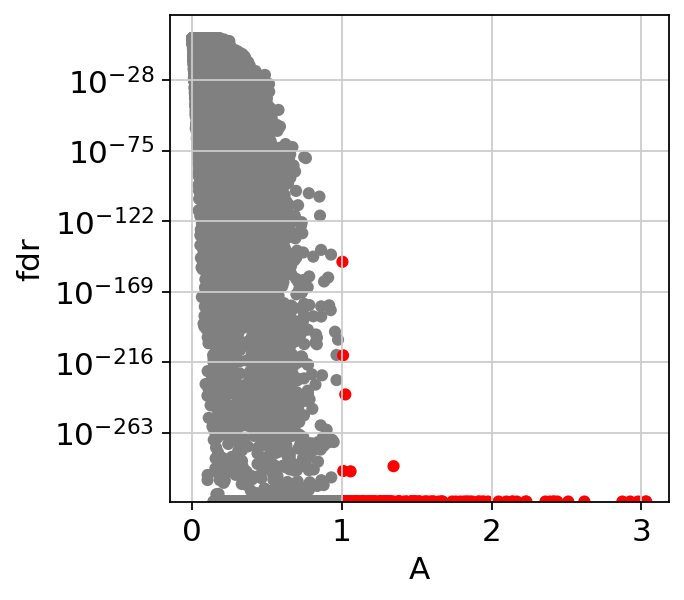

In [14]:
sc.set_figure_params()
scf.pl.test_association(adata)
plt.savefig("figures/C_v2.pdf",dpi=300)

In [16]:
scf.tl.fit(adata,n_jobs=20)

fit features associated with the trajectory
    single mapping :   0%|          | 0/181 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 3/181 [01:24<1:23:33, 28.17s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 5/181 [01:26<50:32, 17.23s/it]  

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 8/181 [01:27<31:23, 10.89s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 9/181 [01:27<27:53,  9.73s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 16/181 [01:30<15:30,  5.64s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 17/181 [01:30<14:35,  5.34s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 20/181 [01:31<12:17,  4.58s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 23/181 [01:32<10:33,  4.01s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 94/181 [02:22<02:11,  1.51s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 107/181 [02:31<01:44,  1.41s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 120/181 [02:46<01:24,  1.39s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 131/181 [03:53<01:29,  1.78s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 147/181 [04:09<00:57,  1.70s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 163/181 [04:12<00:27,  1.55s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 174/181 [04:18<00:10,  1.48s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 176/181 [04:27<00:07,  1.52s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 178/181 [04:42<00:04,  1.59s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 179/181 [04:53<00:03,  1.64s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|██████████| 181/181 [05:04<00:00,  1.68s/it]
    finished (adata subsetted to keep only fitted features!) (0:05:09) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

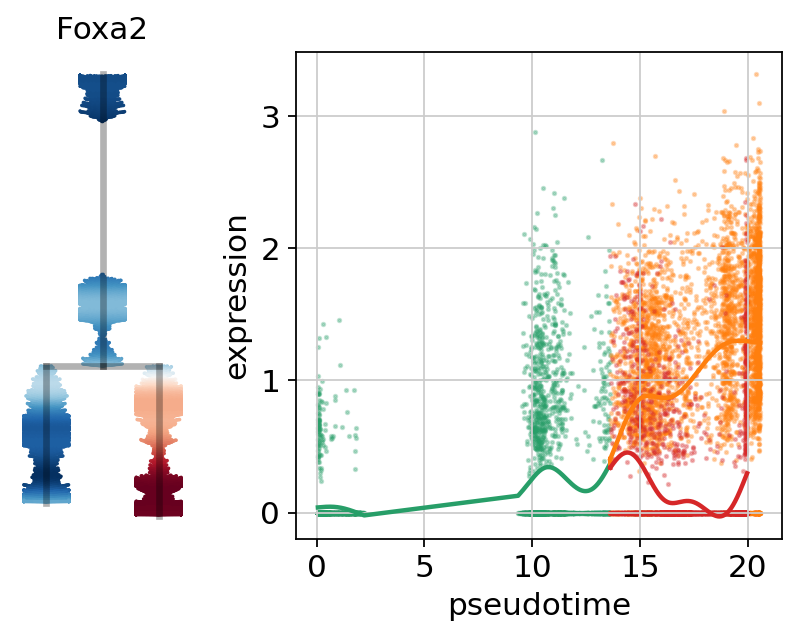

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

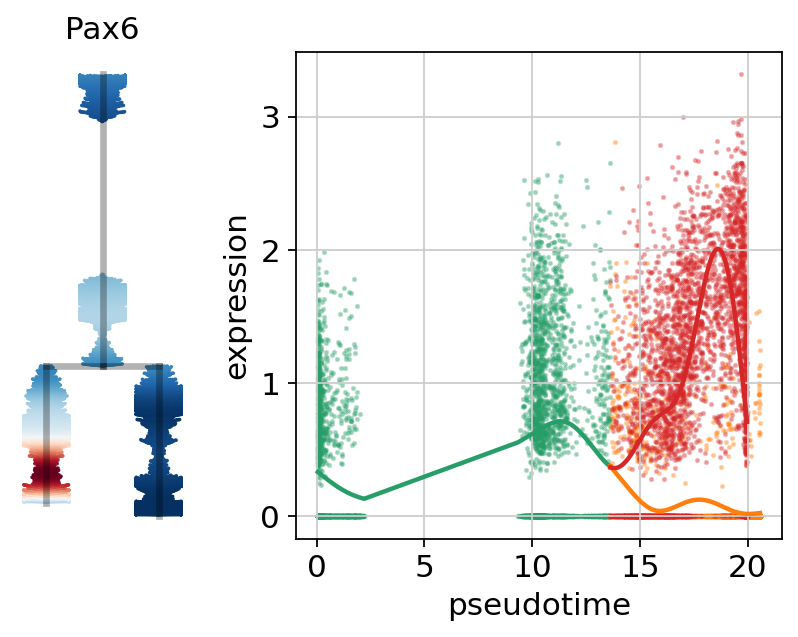

In [17]:
# Plotting single features
sc.set_figure_params(figsize=(.8,4),frameon=False)
scf.set_figure_pubready()
scf.pl.single_trend(adata,"Foxa2",basis="dendro",wspace=-.25,save="_E1.pdf")
scf.pl.single_trend(adata,"Pax6",basis="dendro",wspace=-.25,save="_E2.pdf")

In [12]:
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2_trajectory_fit.h5ad'), compression="gzip")

In [45]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2_trajectory_fit.h5ad'),chunk_size=6000)

In [18]:
adata.layers["fitted"]

array([[ 1.28849242e-01,  3.20281794e-01,  3.34796711e+00, ...,
        -1.57408607e-04,  9.73456115e-04, -2.52770266e-04],
       [ 1.31088595e-01,  3.20132139e-01,  3.36314701e+00, ...,
        -2.08246865e-04,  1.37471219e-03, -3.54481457e-04],
       [ 3.30068308e-02,  3.11465314e-01,  2.89454214e+00, ...,
         3.94743631e-04, -2.06507223e-03,  5.66747455e-04],
       ...,
       [-1.58525497e-02,  1.23084363e+00,  2.33672386e+00, ...,
         1.45071381e+00,  4.05586871e-01,  1.00578867e+00],
       [ 1.67766784e-02,  8.07622567e-02,  2.84473811e+00, ...,
         4.09211107e-02,  1.73113090e+00,  2.00686425e-02],
       [ 1.62563225e-02,  1.37282283e+00,  2.26787732e+00, ...,
         1.52836775e+00,  3.98007026e-01,  1.11371339e+00]])

In [20]:
adata

AnnData object with n_obs × n_vars = 12000 × 181
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'condition_colors', 'dendro_segments', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_pca_seurat', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    layers: 'fitted'
    obsp: 'connectivities', 'distances'

In [21]:
# All branches DE analysis
scf.tl.test_fork(adata,root_milestone="Root",milestones=["NP","FP"],n_jobs=20, rescale=True)

testing fork
    single mapping
    Differential expression:  26%|██▌       | 47/181 [00:44<02:08,  1.05it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  29%|██▊       | 52/181 [01:00<02:29,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  36%|███▌      | 65/181 [01:17<02:18,  1.19s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  36%|███▋      | 66/181 [01:26<02:29,  1.30s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  40%|███▉      | 72/181 [01:33<02:22,  1.30s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  41%|████      | 74/181 [02:05<03:01,  1.70s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  41%|████▏     | 75/181 [02:13<03:08,  1.78s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  66%|██████▌   | 119/181 [02:45<01:26,  1.39s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  82%|████████▏ | 149/181 [03:02<00:39,  1.22s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  86%|████████▌ | 156/181 [03:09<00:30,  1.21s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  90%|████████▉ | 162/181 [03:25<00:24,  1.27s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|██████████| 181/181 [04:01<00:00,  1.33s/it]
    test for upregulation for each leave vs root
    upreg NP:  90%|█████████ | 75/83 [00:02<00:00, 29.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    upreg FP:  99%|█████████▉| 97/98 [00:00<00:00, 302.68it/s]

by .GlobalEnv when processing object ‘aa’


    upreg FP: 100%|██████████| 98/98 [00:54<00:00,  1.80it/s] 
    finished (0:06:01) --> added 
    .uns['Root->NP<>FP']['fork'], DataFrame with fork test results.


In [22]:
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2_trajectory_fit_testFork.h5ad'), compression="gzip")

In [87]:
adata = sc.read_h5ad(os.path.join(outDir, 'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2_trajectory_fit_testFork.h5ad'),chunk_size=6000)

In [28]:
# test the thresholding parameters
scf.tl.branch_specific(adata,root_milestone="Root", milestones=["NP","FP"], effect= 0.2, stf_cut = 0.1, up_A = 0., copy = True)

    branch specific features: FP: 53, NP: 17
    finished --> updated 
    .uns['Root->NP<>FP']['fork'], DataFrame updated with additionnal 'branch' column.


AnnData object with n_obs × n_vars = 12000 × 181
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'condition_colors', 'dendro_segments', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list', 'Root->NP<>FP'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_pca_seurat', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    layers: 'fitted'
    obsp: 'connectivities', 'distances'

In [29]:
scf.tl.branch_specific(adata,root_milestone="Root", milestones=["NP","FP"], effect=0.2,stf_cut = 0.1, copy = False)

    branch specific features: FP: 53, NP: 17
    finished --> updated 
    .uns['Root->NP<>FP']['fork'], DataFrame updated with additionnal 'branch' column.


In [30]:
# Displaying results using heatmap plots

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

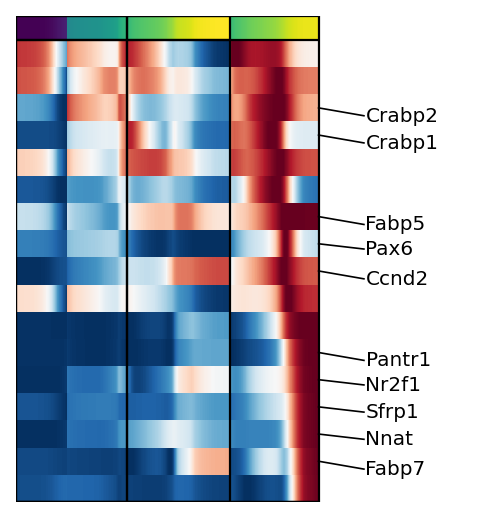

In [31]:
g1=scf.pl.trends(adata,
                 root_milestone="Root",
                 milestones=["NP","FP"],
                 branch="NP",
                 plot_emb=False,ordering="max",return_genes=True)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

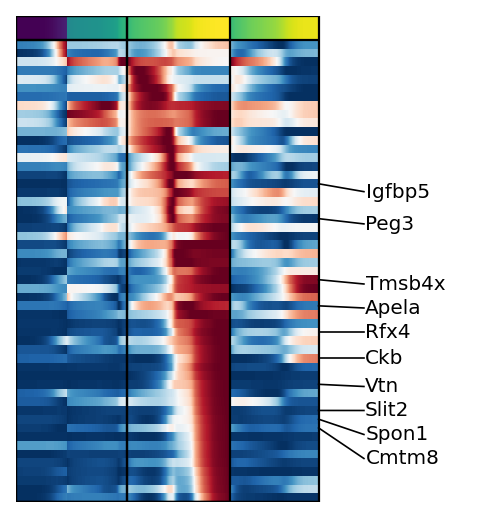

In [32]:
g2=scf.pl.trends(adata,
                 root_milestone="Root",
                 milestones=["NP", "FP"],
                 branch="FP",
                 plot_emb=False,ordering="max",return_genes=True)


In [33]:
gg=g1.tolist() + g2.tolist()

In [34]:
gg

['Nhp2',
 'Set',
 'Crabp2',
 'Crabp1',
 'Bzw2',
 'Gas1',
 'Fabp5',
 'Pax6',
 'Ccnd2',
 'Slc25a5',
 'Pou3f2',
 'Pantr1',
 'Nr2f1',
 'Sfrp1',
 'Nnat',
 'Fabp7',
 'Nkx6-2',
 'Mxd4',
 'Cald1',
 'Mdk',
 'Col4a1',
 'Emb',
 'Wbp5',
 'Arg1',
 'Hspa5',
 'Pdia6',
 'Hsp90b1',
 'Krt18',
 'Sox4',
 'Gpc3',
 'Dstn',
 'Dsp',
 'Hes1',
 'Igfbp5',
 'Zfp503',
 'Kcnq1ot1',
 'Pdcd4',
 'Peg3',
 'Gnas',
 'S100a10',
 'Foxa2',
 'Sox2',
 'Tm9sf3',
 'Fxyd6',
 'Tmsb4x',
 'Tuba1a',
 'Ubb',
 'Apela',
 'Igdcc3',
 'Ntn1',
 'Rfx4',
 'H2afv',
 'Nectin3',
 'Ckb',
 'Slit1',
 'Shh',
 'Vtn',
 'Itm2b',
 'Ralgps2',
 'Slit2',
 'Spon1',
 'Cmtm8',
 'Arx',
 'Sulf1',
 'Tppp3',
 'Kitl',
 'Metrnl',
 'Tshz2',
 'Hmgn3',
 'Anxa2']

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

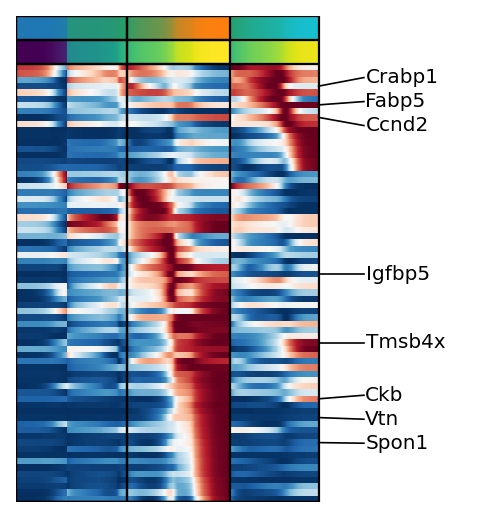

In [35]:
import matplotlib.pyplot as plt
g=scf.pl.trends(adata,gg,figsize=(4,4),annot="milestones",n_features=8,
        plot_emb=False,ordering=None,return_genes=True)
plt.savefig("figures/D.pdf",dpi=300)


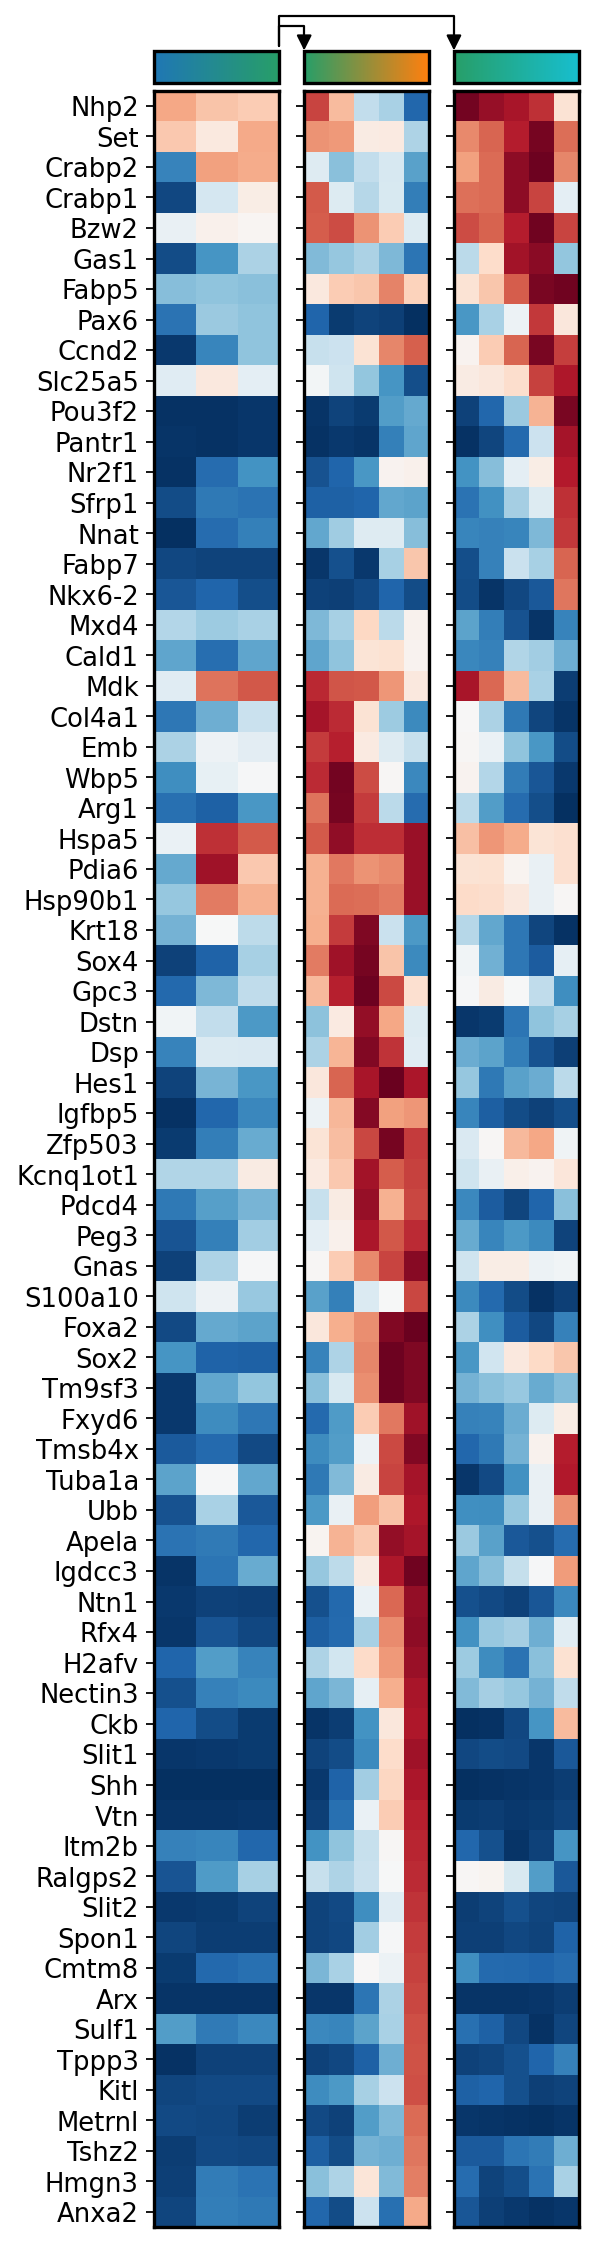

In [36]:
# Displaying results using matrix plot
sc.set_figure_params()
scf.pl.matrix(adata,gg,norm="minmax",cmap="RdBu_r",colorbar=False,save="_F.pdf")

In [ ]:
# Bifurcation analysis

In [132]:
scf.tl.test_fork(adata,root_milestone="Root",milestones=["NP", "FP"],n_jobs=20, rescale=True)

testing fork
    single mapping
    Differential expression:   0%|          | 0/181 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:   2%|▏         | 3/181 [00:59<59:17, 19.99s/it]  

by .GlobalEnv when processing object ‘aa’


    Differential expression:   3%|▎         | 5/181 [01:02<36:31, 12.45s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:   3%|▎         | 6/181 [01:03<30:51, 10.58s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:   4%|▍         | 7/181 [01:04<26:53,  9.27s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  14%|█▍        | 25/181 [01:13<07:36,  2.93s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  19%|█▉        | 34/181 [01:13<05:19,  2.17s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  62%|██████▏   | 113/181 [01:55<01:09,  1.02s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  64%|██████▍   | 116/181 [02:05<01:10,  1.08s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  69%|██████▊   | 124/181 [02:11<01:00,  1.06s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  74%|███████▍  | 134/181 [02:21<00:49,  1.05s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  76%|███████▌  | 138/181 [02:27<00:45,  1.07s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  78%|███████▊  | 142/181 [02:31<00:41,  1.07s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  80%|███████▉  | 144/181 [02:36<00:40,  1.09s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  93%|█████████▎| 168/181 [02:50<00:13,  1.01s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  99%|█████████▉| 179/181 [02:59<00:02,  1.00s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|██████████| 181/181 [03:11<00:00,  1.06s/it]
    test for upregulation for each leave vs root
    upreg NP:  94%|█████████▍| 78/83 [00:02<00:00, 32.74it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    upreg FP:  98%|█████████▊| 96/98 [00:00<00:00, 317.50it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    upreg FP: 100%|██████████| 98/98 [00:43<00:00,  2.27it/s] 
    finished (0:04:49) --> added 
    .uns['Root->NP<>FP']['fork'], DataFrame with fork test results.


In [133]:
scf.tl.branch_specific(adata,root_milestone="Root",milestones=["NP", "FP"], effect=0.2)

    branch specific features: FP: 53, NP: 17
    finished --> updated 
    .uns['Root->NP<>FP']['fork'], DataFrame updated with additionnal 'branch' column.


In [134]:
# Early gene detection
scf.tl.activation_lm(adata,root_milestone="Root", milestones=["NP", "FP"], n_jobs=20, 
                    fdr_cut= 0.01, stf_cut = 0.7)

    single mapping
    prefork activation: 100%|██████████| 70/70 [00:00<00:00, 295.10it/s]
    8 early and 9 late features specific to leave NP
    36 early and 17 late features specific to leave FP
    finished (0:00:00) --> updated 
    .uns['Root->NP<>FP']['fork'], DataFrame updated with additionnal 'slope','pval','fdr','prefork_signi' and 'module' columns.


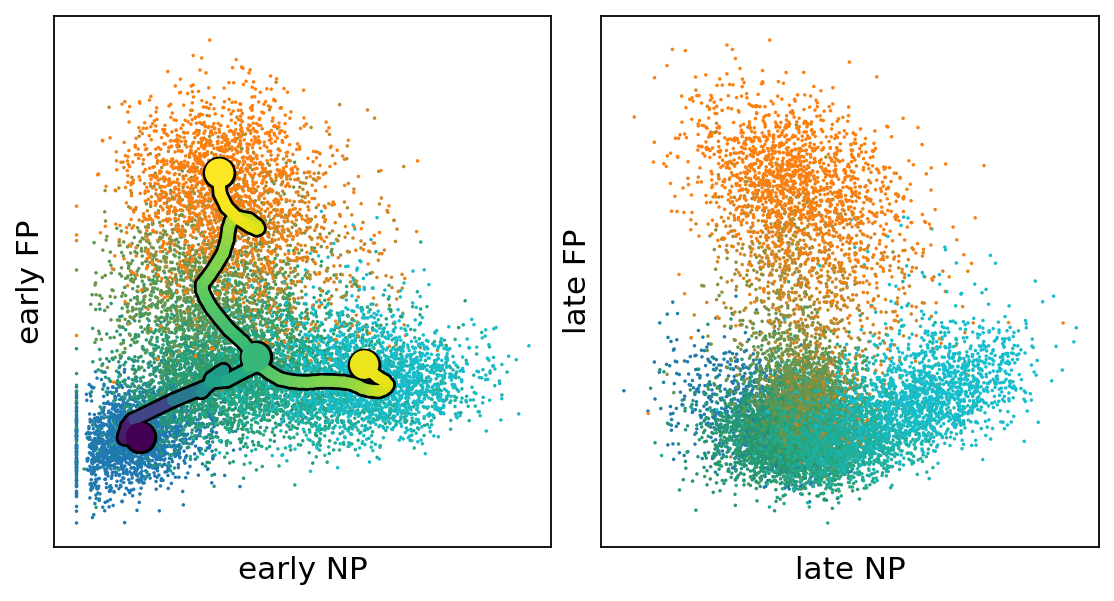

In [144]:
scf.pl.modules(adata,root_milestone="Root", milestones=["NP", "FP"],
               smooth=False, show_traj = True, module="all",save="_G_v2.pdf")

In [136]:
adata

AnnData object with n_obs × n_vars = 12000 × 181
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones', 'inter_cor Root->NP<>FP'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'condition_colors', 'dendro_segments', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list', 'Root->NP<>FP'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_pca_seurat', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    layers: 'fitted'
    obsp: 'connectivities', 'distances'

In [137]:
# extract the early and late modules
df=adata.uns["Root->NP<>FP"]["fork"].copy()
#df.index="\textit{"+df.index+"}"
eFP=df.index[(df.module=="early") & (df.branch=="FP")]
lFP=df.index[(df.module=="late") & (df.branch=="FP")]
eNP=df.index[(df.module=="early") & (df.branch=="NP")]
lNP=df.index[(df.module=="late") & (df.branch=="NP")]
import pandas as pd
dat=pd.DataFrame({'early FP': pd.Series(eFP), 
                  'late FP': pd.Series(lFP),
                  'early NP': pd.Series(eNP),
                  'late NP': pd.Series(lNP)})
dat=dat.fillna('')

In [138]:
dat

early FP  late FP early NP  late NP
0     Igfbp5    Sulf1     Pax6      Set
1    Ralgps2     Dstn     Nnat  Slc25a5
2      Hspa5   Tmsb4x   Crabp2    Fabp5
3        Mdk     Sox2    Ccnd2   Pou3f2
4      Foxa2  S100a10    Sfrp1   Nkx6-2
5       Gnas     Mxd4   Crabp1    Fabp7
6       Gpc3    Cald1     Gas1     Nhp2
7       Wbp5    Spon1    Nr2f1     Bzw2
8      Slit2     Kitl            Pantr1
9       Peg3    Apela                  
10  Kcnq1ot1    Itm2b                  
11      Rfx4      Vtn                  
12   Hsp90b1   Metrnl                  
13    Col4a1      Ckb                  
14     Tppp3     Arg1                  
15    Zfp503      Shh                  
16     Fxyd6      Arx                  
17    Igdcc3                           
18     Anxa2                           
19     Hmgn3                           
20     Cmtm8                           
21     H2afv                           
22       Ubb                           
23      Ntn1                           
24      Sox4                           
25       Dsp                           
26       Emb                           
27     Pdia6                           
28    Tuba1a                           
29     Krt18                           
30      Hes1                           
31   Nectin3                           
32    Tm9sf3                           
33     Pdcd4                           
34     Slit1                           
35     Tshz2

In [139]:
dat.to_csv(os.path.join(outDir, 'scFates_early_late_modules_NP_FP_tl.test.fork.rescaled_v2.csv'))
#with open(os.path.join(outDir + "scFates_early_late_modules_NP_FP.txt"), 'w') as f:
#        f.write(dat)

In [140]:
# Repulsion of early gene modules
scf.tl.slide_cells(adata,root_milestone="Root",milestones=["NP", "FP"],win=2000)

--> added 
    .uns['Root->NP<>FP']['cell_freq'], probability assignment of cells on 7 non intersecting windows.


In [141]:
scf.tl.slide_cors(adata,root_milestone="Root",milestones=["NP", "FP"])

--> added 
    .uns['Root->NP<>FP']['corAB'], gene-gene correlation modules.


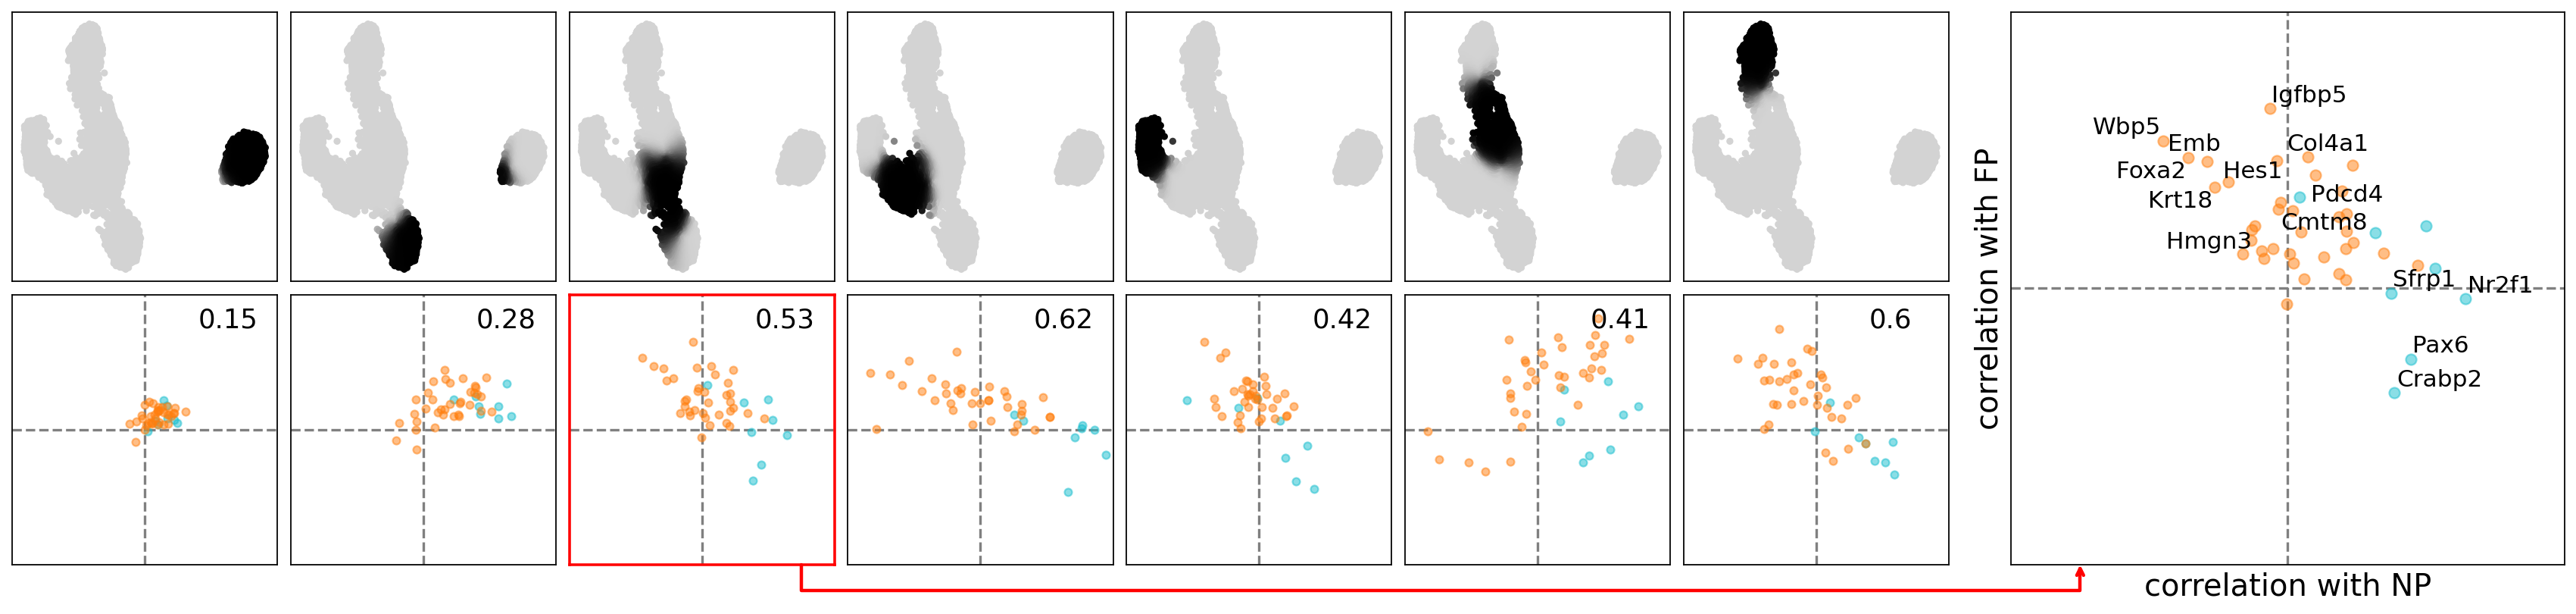

In [142]:
sc.set_figure_params()
scf.pl.slide_cors(adata,root_milestone="Root",milestones=["NP", "FP"],basis="umap",win_keep=[0,1,2,3,4,5,6],
                 focus=2, top_focus = 10, save="_H.pdf")

In [105]:
# Local trend of module correlations
scf.tl.synchro_path(adata,root_milestone="Root", milestones=["NP", "FP"],w=100,n_map=50,n_jobs=20)

computing local correlations
    multi mapping:   0%|          | 0/50 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    multi mapping:   2%|▏         | 1/50 [01:27<1:11:51, 87.99s/it]

by .GlobalEnv when processing object ‘aa’


    multi mapping permutations: 100%|██████████| 50/50 [00:52<00:00,  1.06s/it]
    finished (0:02:56) --> added 
    .uns['Root->NP<>FP']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Root->NP<>FP'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


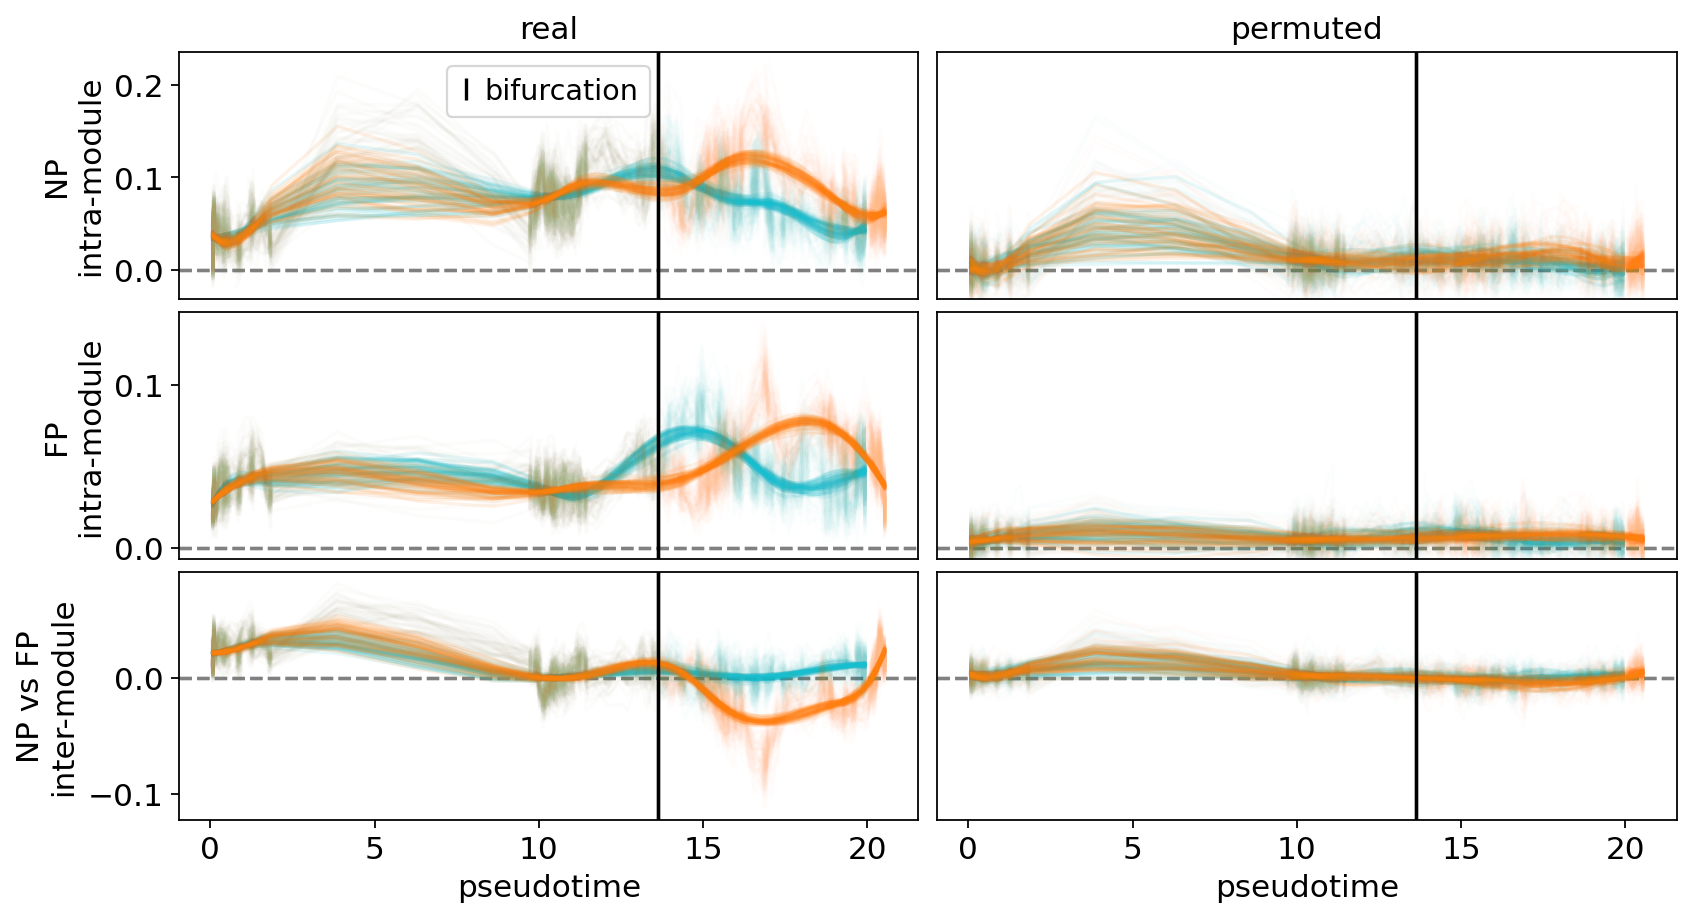

In [106]:
scf.pl.synchro_path(adata,root_milestone="Root", milestones=["NP", "FP"], save="_I.pdf")